In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import talib as ta # conda activate cryt310 
from aver5_funcs import get_data
import pickle 
from scipy import stats
import requests
from tqdm import tqdm

In [2]:
with open("trading_pairs_with_highvol_USDTonly.pkl","rb") as f:
    valid_symbols = pickle.load(f)

In [3]:
len(valid_symbols)

337

In [4]:
%%time
data=[]
for valid_symbol in tqdm(valid_symbols):
    dfmpl =get_data(valid_symbol+"USDT","1h")
    data.append((dfmpl.Open*0.5+dfmpl.Close*0.5).values)

100%|████████████████████████████████████████████████████████████████████████████████| 337/337 [01:12<00:00,  4.62it/s]

CPU times: total: 2.91 s
Wall time: 1min 13s


In [5]:
from collections import Counter
Counter([len(d) for d in data])

Counter({1000: 333, 50: 1, 534: 1, 412: 1, 32: 1})

In [6]:
%%time
data2 = np.asarray([d for d in data if len(d)==1000])

CPU times: total: 0 ns
Wall time: 2 ms


Text(0.5, 0, 'daily minor ticks')

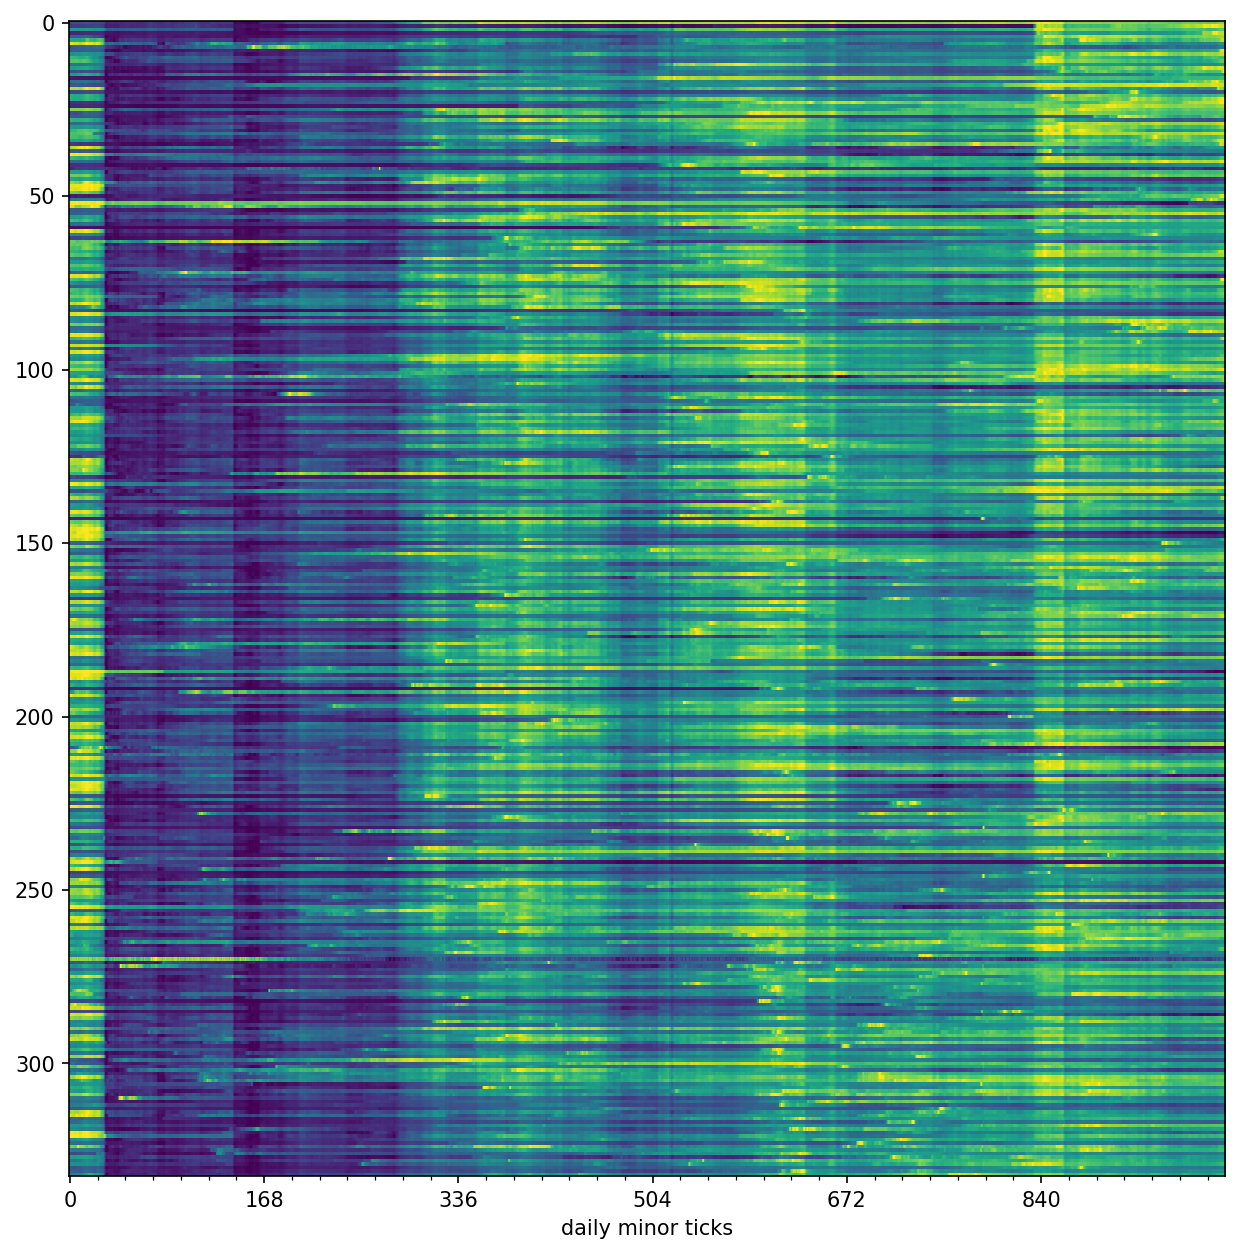

In [15]:
data3 = (data2-np.min(data2,axis=1)[:,np.newaxis])/(np.max(data2,axis=1)[:,np.newaxis]-np.min(data2,axis=1)[:,np.newaxis])
plt.figure(figsize=(10,10),dpi=150)
plt.imshow(data3,interpolation="none",aspect=3)
plt.xticks(ticks=range(0,len(data3[0]),24*7));
plt.xticks(ticks=range(0,len(data3[0]),24),minor=True);
plt.xlabel("daily minor ticks")

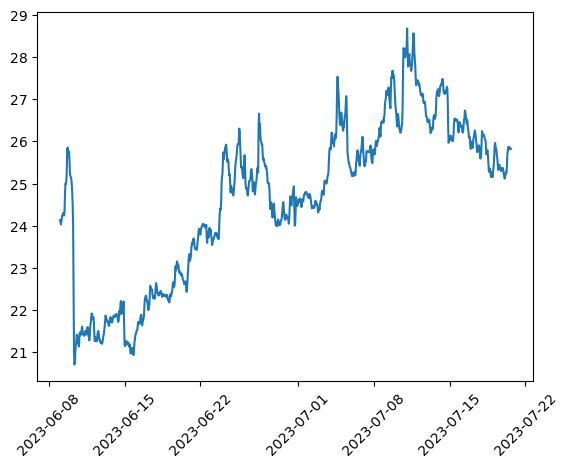

In [8]:
plt.plot(dfmpl.Open*0.5+dfmpl.Close*0.5)
plt.xticks(rotation=45);

# hourly data

In [9]:
hr24change = (data2[:,24:]-data2[:,:-24])/data2[:,:-24]

Text(0.5, 0, 'daily minor ticks')

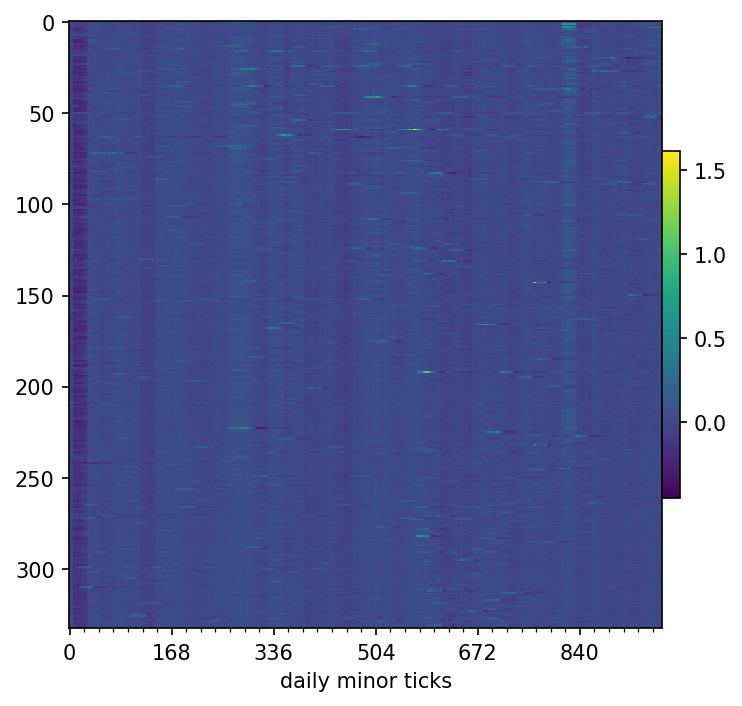

In [10]:
plt.figure(figsize=(6,6),dpi=150)
im = plt.imshow(hr24change,interpolation="none",aspect=3)
plt.colorbar(im,shrink=0.5,pad=0)
plt.xticks(ticks=range(0,len(hr24change[0]),24*7));
plt.xticks(ticks=range(0,len(hr24change[0]),24),minor=True);
plt.xlabel("daily minor ticks")

In [88]:
np.max(argsort)

332

(100.0, 250.0)

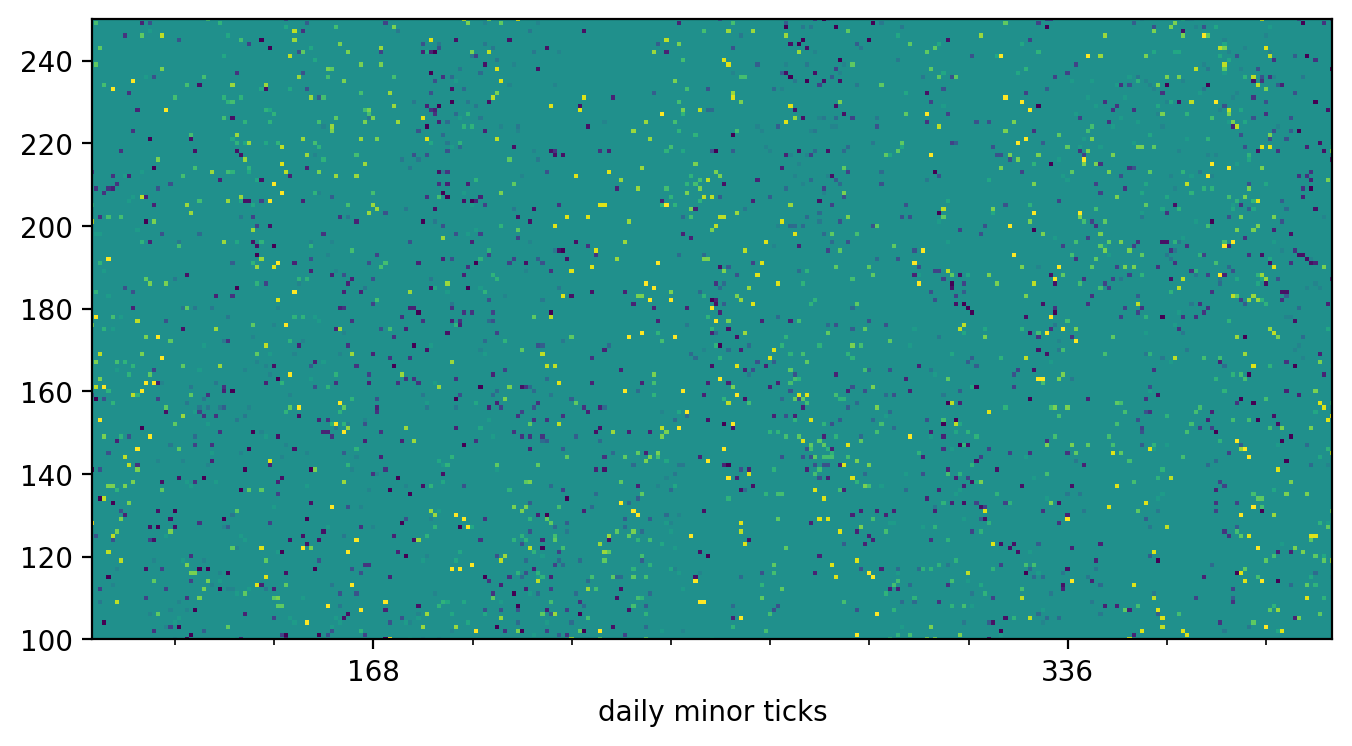

In [90]:
plt.figure(figsize=(8,8),dpi=200)
argsort = np.argsort(-hr24change,axis=0)

plt.imshow(((1+argsort)*(argsort<10))+((332-argsort-10)*(argsort>322)),interpolation="none")#,aspect=3)

plt.xticks(ticks=range(0,len(hr24change[0]),24*7));
plt.xticks(ticks=range(0,len(hr24change[0]),24),minor=True);
plt.xlabel("daily minor ticks")
plt.xlim(100,400)
plt.ylim(100,250)

In [21]:
subset_symbols=[]
for i,(valid_symbol,d) in enumerate(zip(valid_symbols,data)):
    if len(d)==1000:
        subset_symbols.append(valid_symbol)

In [51]:
top5 = argsort[:20,-1]
top5

array([119,  50,   8,  35,   3,  14,  74,  91,  22,  19,  65,  77,  34,
        66, 137,  31, 125,  11, 141, 202], dtype=int64)

In [52]:
[subset_symbols[i] for i in top5]

['MC',
 'AGLD',
 'LINK',
 'ACA',
 'XLM',
 'SNX',
 'BAND',
 'TRB',
 'DYDX',
 'DAR',
 'RDNT',
 'ONE',
 'NEAR',
 'XTZ',
 'API3',
 'LDO',
 'MOB',
 'MATIC',
 'VOXEL',
 'YGG']

# hypothesis to test

- ~~if there are 3 consecutive gains of 3% in 1hr intervals (and previous 24hr gains are less than 9%), and the next tick is green.~~
    - this is wrong, 3 consecutive gains in 1hrs is not related to 24hr changes
    

In [72]:
np.diff((hr24change>0.03)*1,axis=-1)[151:170,146:158]

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  1, -1,  0,  1, -1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1],
       [-1,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,

In [69]:
subset_symbols[151]

'JOE'

In [73]:
dfmpl.iloc[146:146+24]

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-15 03:00:00,21.20,21.34,21.16,21.34,89.861
2023-06-15 04:00:00,21.33,21.37,21.16,21.16,43.969
2023-06-15 05:00:00,21.19,21.22,21.16,21.22,13.537
2023-06-15 06:00:00,21.22,21.28,21.19,21.28,60.547
2023-06-15 07:00:00,21.28,21.28,21.18,21.21,89.124
2023-06-15 08:00:00,21.20,21.22,21.12,21.20,119.542
2023-06-15 09:00:00,21.21,21.24,21.10,21.10,92.779
2023-06-15 10:00:00,21.07,21.24,21.03,21.20,80.693
2023-06-15 11:00:00,21.20,21.25,21.16,21.19,46.976


In [57]:
(hr24change>0.03)*1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [4]:
tickerpair = tradingpairs[-100:][4]["symbol"]
tickerpair="WRXUSDT";interval="5m"
#tickerpair="ETCUSDT";interval="5m"
#tickerpair="LTCUSDT";interval="5m"

In [9]:
from tqdm import tqdm
limit=1000

In [151]:
res_list=[]
for ind in tqdm(range(len(tradingpairs))):
    #if ind%5!=0 :continue
    tickerpair = tradingpairs[ind]["symbol"]
    
    dfmpl = get_data(tickerpair,"1h",limit=limit)
    #print(len(dfmpl))
    dfmpl=dfmpl.iloc[-limit:]
    x=dfmpl.Volume.iloc[:-1].values
    y=((dfmpl.High-dfmpl.Low)*0.5/(dfmpl.High+dfmpl.Low)).iloc[1:].values
    selected= (y!=0) & (x!=0)
    res = stats.linregress(np.log(x[selected]),np.log( y[selected]))
    #print(f"R-squared: {res.rvalue**2:.6f}")
    diff_max=-9999;percentile_max=0
    for percentile in [95,96,97,98,99]:
        selected_per=x>np.percentile(x,percentile)
        diff = np.mean([ (dfmpl.Close.iloc[i]-dfmpl.Open.iloc[i])/dfmpl.Open.iloc[i]*100 for i in np.where(selected_per)[0]+1])
        if diff>diff_max:
            diff_max=diff;percentile_max=percentile
    res_list.append((res.rvalue**2,percentile_max,diff_max))
    

100%|████████████████████████████████████████████████████████████████████████████████| 819/819 [02:50<00:00,  4.81it/s]


In [12]:
import datetime

In [27]:
ddt=datetime.datetime.utcnow()
ddt.timestamp()

1689663506.08158

'1689663506'

In [59]:
dfmpl = get_data(tickerpair,"1h",limit=3,start_time=f"{int(ddt.timestamp())*1000+9*3600*1000}")

KeyboardInterrupt: 

In [ ]:
dfmpl

In [6]:
# with open("9_0_0_analysisdata/linregress_diffmax.pkl","wb") as f:
#     pickle.dump(res_list,f)
with open("9_0_0_analysisdata/linregress_diffmax.pkl","rb") as f:
    res_list = pickle.load(f)

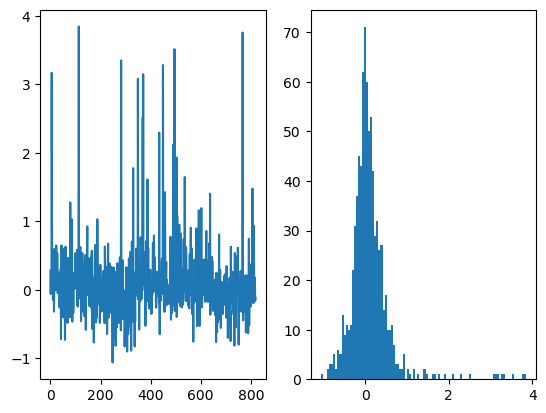

In [7]:
fig,axx=plt.subplots(1,2)
axx[0].plot(np.asarray(res_list)[:,2])
axx[1].hist(np.asarray(res_list)[:,2],bins=100);

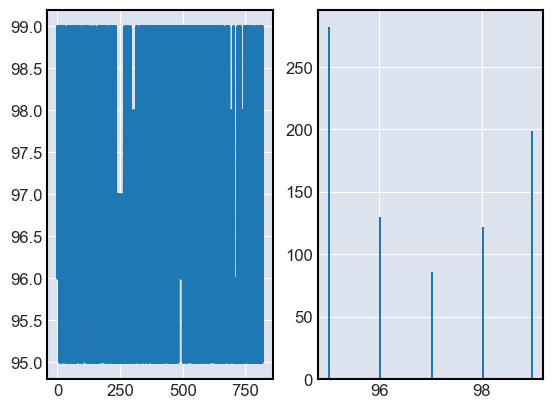

In [153]:
fig,axx=plt.subplots(1,2)
axx[0].plot(np.asarray(res_list)[:,1])
axx[1].hist(np.asarray(res_list)[:,1],bins=100);

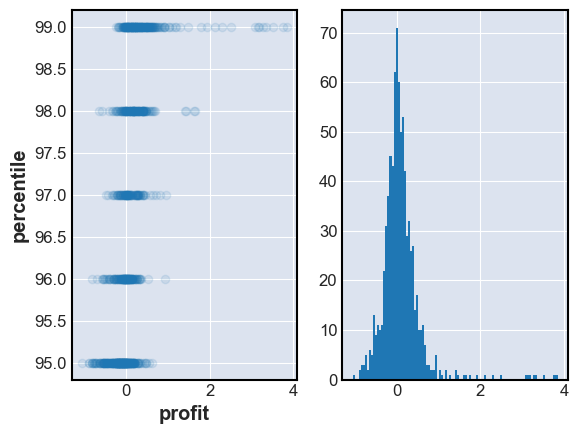

In [158]:
fig,axx=plt.subplots(1,2)
axx[0].scatter(np.asarray(res_list)[:,2],np.asarray(res_list)[:,1],alpha=0.1)
axx[0].set_xlabel("profit")
axx[0].set_ylabel("percentile")
axx[1].hist(np.asarray(res_list)[:,2],bins=100);

In [164]:
np.where(np.asarray(res_list)[:,2]>0.4)

(array([  5,   6,  16,  17,  23,  27,  43,  44,  45,  56,  60,  64,  70,
         73,  79,  81,  86, 100, 106, 111, 113, 119, 127, 140, 146, 147,
        152, 153, 159, 163, 165, 177, 178, 179, 181, 187, 217, 230, 277,
        282, 288, 313, 317, 319, 325, 330, 342, 349, 353, 360, 366, 368,
        370, 374, 377, 382, 387, 390, 409, 413, 416, 434, 445, 449, 457,
        458, 462, 479, 486, 487, 491, 493, 495, 498, 503, 506, 514, 518,
        520, 531, 532, 534, 536, 541, 542, 556, 560, 563, 575, 582, 583,
        592, 600, 602, 612, 619, 622, 628, 633, 635, 637, 644, 646, 673,
        720, 736, 746, 748, 767, 792, 806, 809, 812], dtype=int64),)

In [8]:
[tradingpairs[ind]["symbol"] for ind in np.where(np.asarray(res_list)[:,2]>0.4)[0]]

['XRPUSDT',
 'SOLUSDT',
 'DOGEUSDT',
 'MATICUSDT',
 'LINAUSDT',
 'ADAUSDT',
 'CAKEUSDT',
 'USTCUSDT',
 'EGLDUSDT',
 'SANDUSDT',
 'BELUSDT',
 'ROSEUSDT',
 'EOSUSDT',
 'NEARUSDT',
 'BCHUSDT',
 'REEFUSDT',
 'SNXUSDT',
 'FXSUSDT',
 'CRVUSDT',
 'BANDUSDT',
 'XLMUSDT',
 'SUSHIUSDT',
 'KLAYUSDT',
 'MKRUSDT',
 'CKBUSDT',
 'XECUSDT',
 'FLOWUSDT',
 'WAVESUSDT',
 'HOTUSDT',
 'COTIUSDT',
 'IOTAUSDT',
 'LITUSDT',
 'QUICKUSDT',
 'BETHUSDT',
 'CHRUSDT',
 'QTUMUSDT',
 'GLMRUSDT',
 'BSWUSDT',
 'MTLUSDT',
 'FLMUSDT',
 'STORJUSDT',
 'PNTUSDT',
 'XVGUSDT',
 'PROSUSDT',
 'FUNUSDT',
 'FORTHUSDT',
 'BNBETH',
 'XRPBNB',
 'IDEXBNB',
 'AVAXBNB',
 'SOLETH',
 'XRPETH',
 'XRPBTC',
 'BNBBTC',
 'FILBNB',
 'LTCETH',
 'BCHBNB',
 'ADAETH',
 'AVAXETH',
 'STXBNB',
 'DYDXBNB',
 'BSWBNB',
 'VETETH',
 'XLMBNB',
 'FUNBNB',
 'CFXBTC',
 'BETAETH',
 'LINABTC',
 'IDEXBTC',
 'FILETH',
 'JASMYBTC',
 'AVAXBTC',
 'XLMETH',
 'FTMETH',
 'XLMBTC',
 'BCHBTC',
 'STMXBTC',
 'ETCBTC',
 'QNTBTC',
 'OPBTC',
 'MAGICBTC',
 'SNXBNB',
 'FUNETH',

In [165]:
res_list[5]

(0.38898530791702507, 99, 3.1699728311641477)

In [170]:
%%time
ind=5;percentile=99
tickerpair = tradingpairs[ind]["symbol"]
limit=1000
dfmpl = get_data(tickerpair,"1h",limit=limit)
#print(len(dfmpl))
dfmpl=dfmpl.iloc[-limit:]
x=dfmpl.Volume.iloc[:-1].values
y=((dfmpl.High-dfmpl.Low)*0.5/(dfmpl.High+dfmpl.Low)).iloc[1:].values
#selected= (y!=0) & (x!=0)
#res = stats.linregress(np.log(x[selected]),np.log( y[selected]))
selected_per=x>np.percentile(x,percentile)
diff_list=[ (dfmpl.Close.iloc[i]-dfmpl.Open.iloc[i])/dfmpl.Open.iloc[i]*100 for i in np.where(selected_per)[0]+1]
diff = np.mean(diff_list)

CPU times: total: 62.5 ms
Wall time: 208 ms


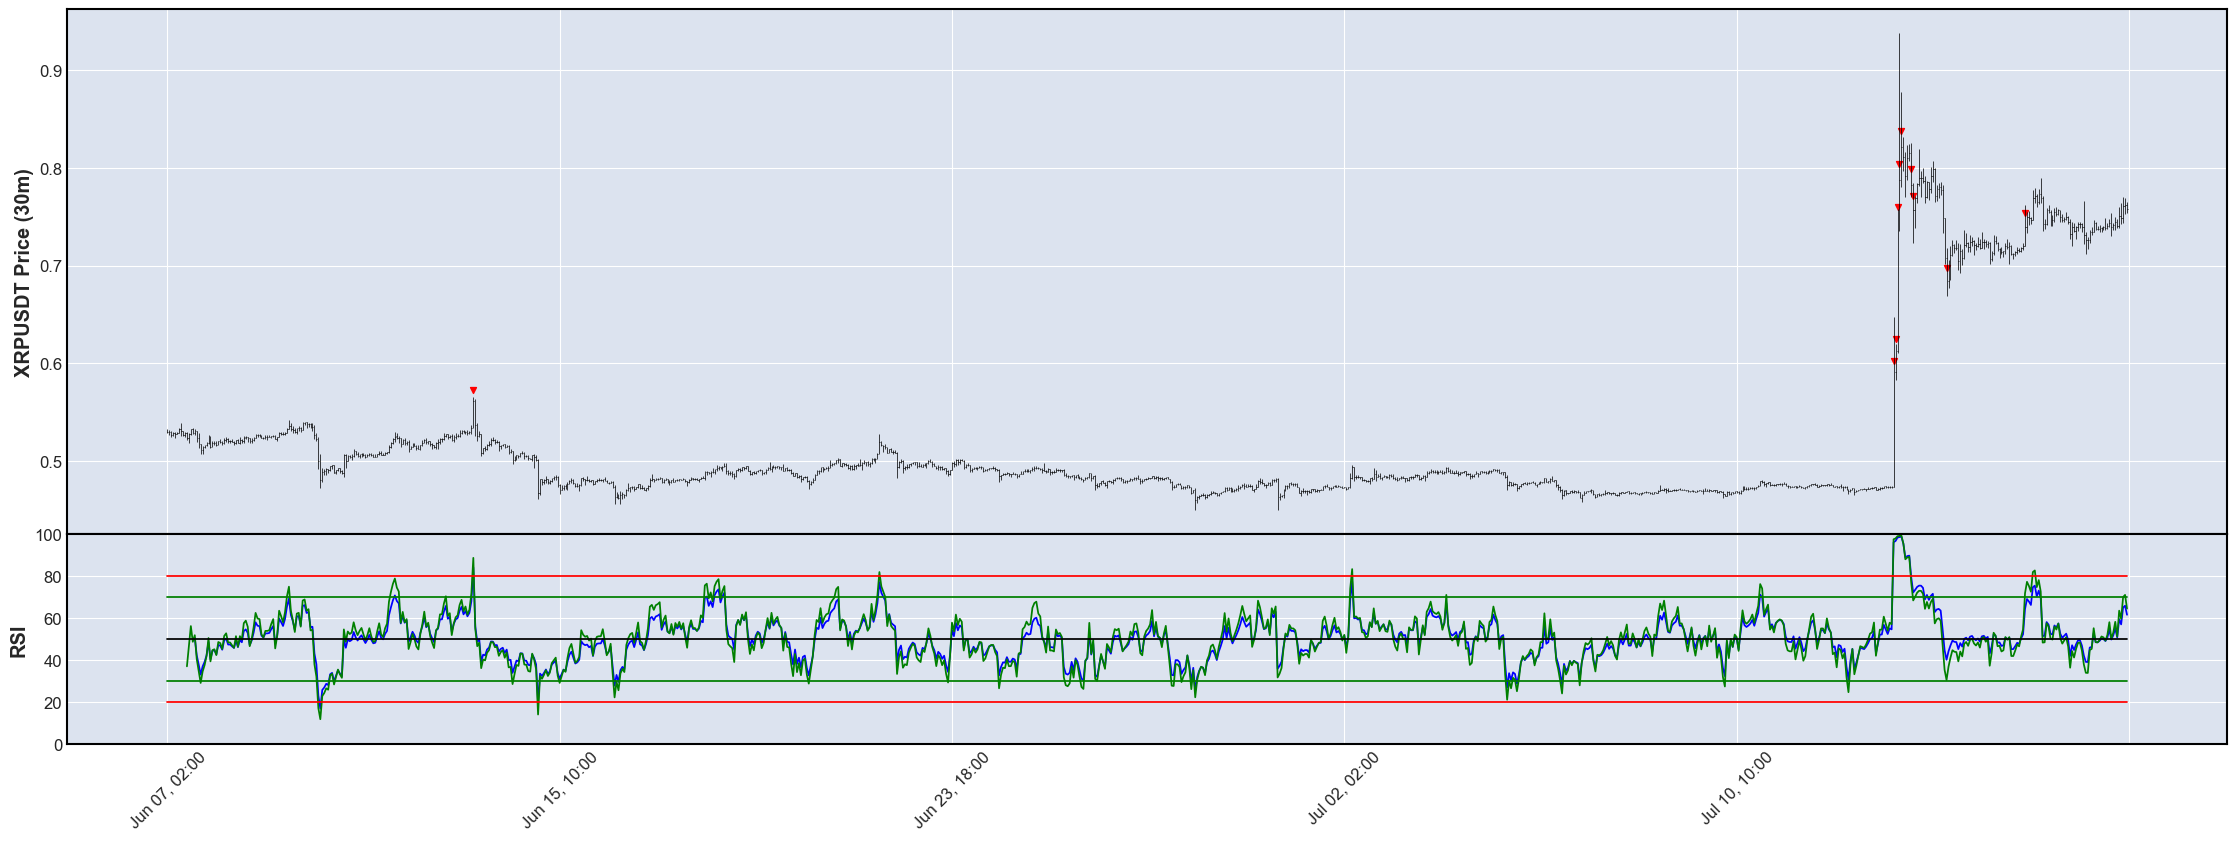

In [173]:
volumeSpike = np.where(selected_per)[0]
scatter = [ dfmpl.Close.iloc[i]*1.02 if i in volumeSpike else np.nan for i in np.arange(len(dfmpl.Close))]
len(volumeSpike)
RSI_close = ta.RSI(dfmpl.Close)
RSI_close10 = ta.RSI(dfmpl.Close,10)
apds = [ #mpf.make_addplot(slo,type='scatter',markersize=200,marker='^'),
    mpf.make_addplot(RSI_close,panel=1,color='b',type='line',ylim=(0,100),ylabel="RSI"),
    mpf.make_addplot(RSI_close10,panel=1,color='g',type='line',ylim=(0,100),secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+70,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+30,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+50,panel=1,color='k',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+80,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+20,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(scatter,color='r',type='scatter',marker="v"),
    #mpf.make_addplot(vlines,color='r',type='vline'),
       ]

fig, axlist =mpf.plot(dfmpl,addplot=apds,ylabel=f"{tickerpair} Price ({interval})",
        #vlines=dict(vlines=vlines,linewidths=0.01,alpha=0.3,colors="r"),
         returnfig=True,figsize=(20*1.5,7*1.5),warn_too_much_data=2000)

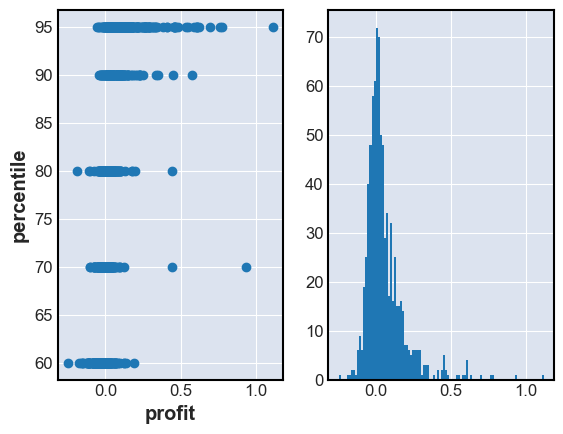

In [148]:
fig,axx=plt.subplots(1,2)
axx[0].scatter(np.asarray(res_list)[:,2],np.asarray(res_list)[:,1])
axx[0].set_xlabel("profit")
axx[0].set_ylabel("percentile")
axx[1].hist(np.asarray(res_list)[:,2],bins=100);

In [69]:
np.where(np.asarray(res_list)>0.5)

(array([ 79, 147, 174, 303, 317], dtype=int64),)

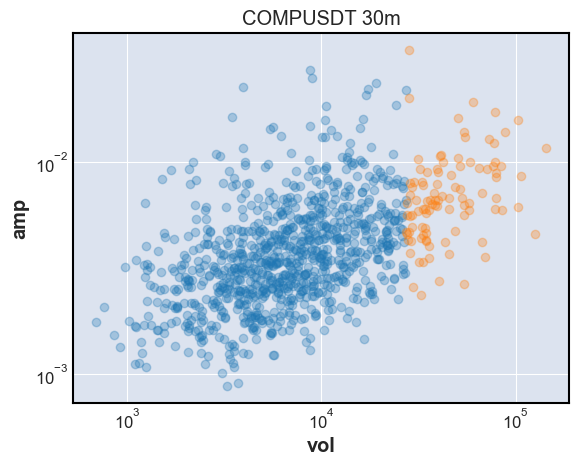

In [130]:
ind=174
tickerpair = tradingpairs[ind]["symbol"]
limit=1000
interval="30m"
dfmpl = get_data(tickerpair,interval,limit=limit)
#print(len(dfmpl))
dfmpl=dfmpl.iloc[-limit:]
x=dfmpl.Volume.iloc[:-1].values
y=((dfmpl.High-dfmpl.Low)*0.5/(dfmpl.High+dfmpl.Low)).iloc[1:].values
selected= (y!=0) & (x!=0)
    
selected_per=x>np.percentile(x,90)
plt.scatter(x[~selected_per],y[~selected_per],alpha=0.3)
plt.scatter(x[selected_per],y[selected_per],alpha=0.3)
plt.title(tickerpair+f" {interval}")
plt.xlabel("vol")
plt.ylabel("amp")
plt.yscale("log")
plt.xscale("log")

Text(0.5, 1.0, 'avg diff=0.13%, trades=100')

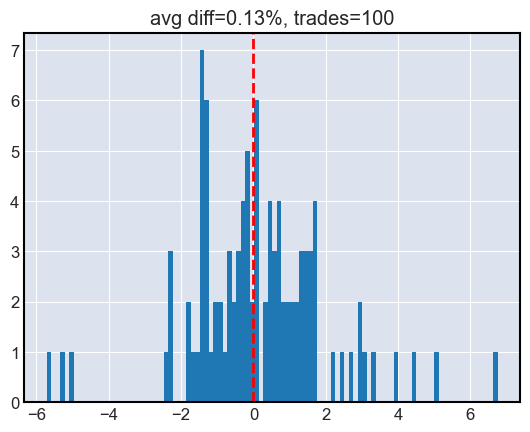

In [133]:
diff = [ (dfmpl.Close.iloc[i]-dfmpl.Open.iloc[i])/dfmpl.Open.iloc[i]*100 for i in np.where(selected_per)[0]+1]
plt.hist(diff,bins=100);
plt.axvline(0,ls="--",c="r")
plt.title(f"avg diff={np.mean(diff):.2g}%, trades={len(diff)}")

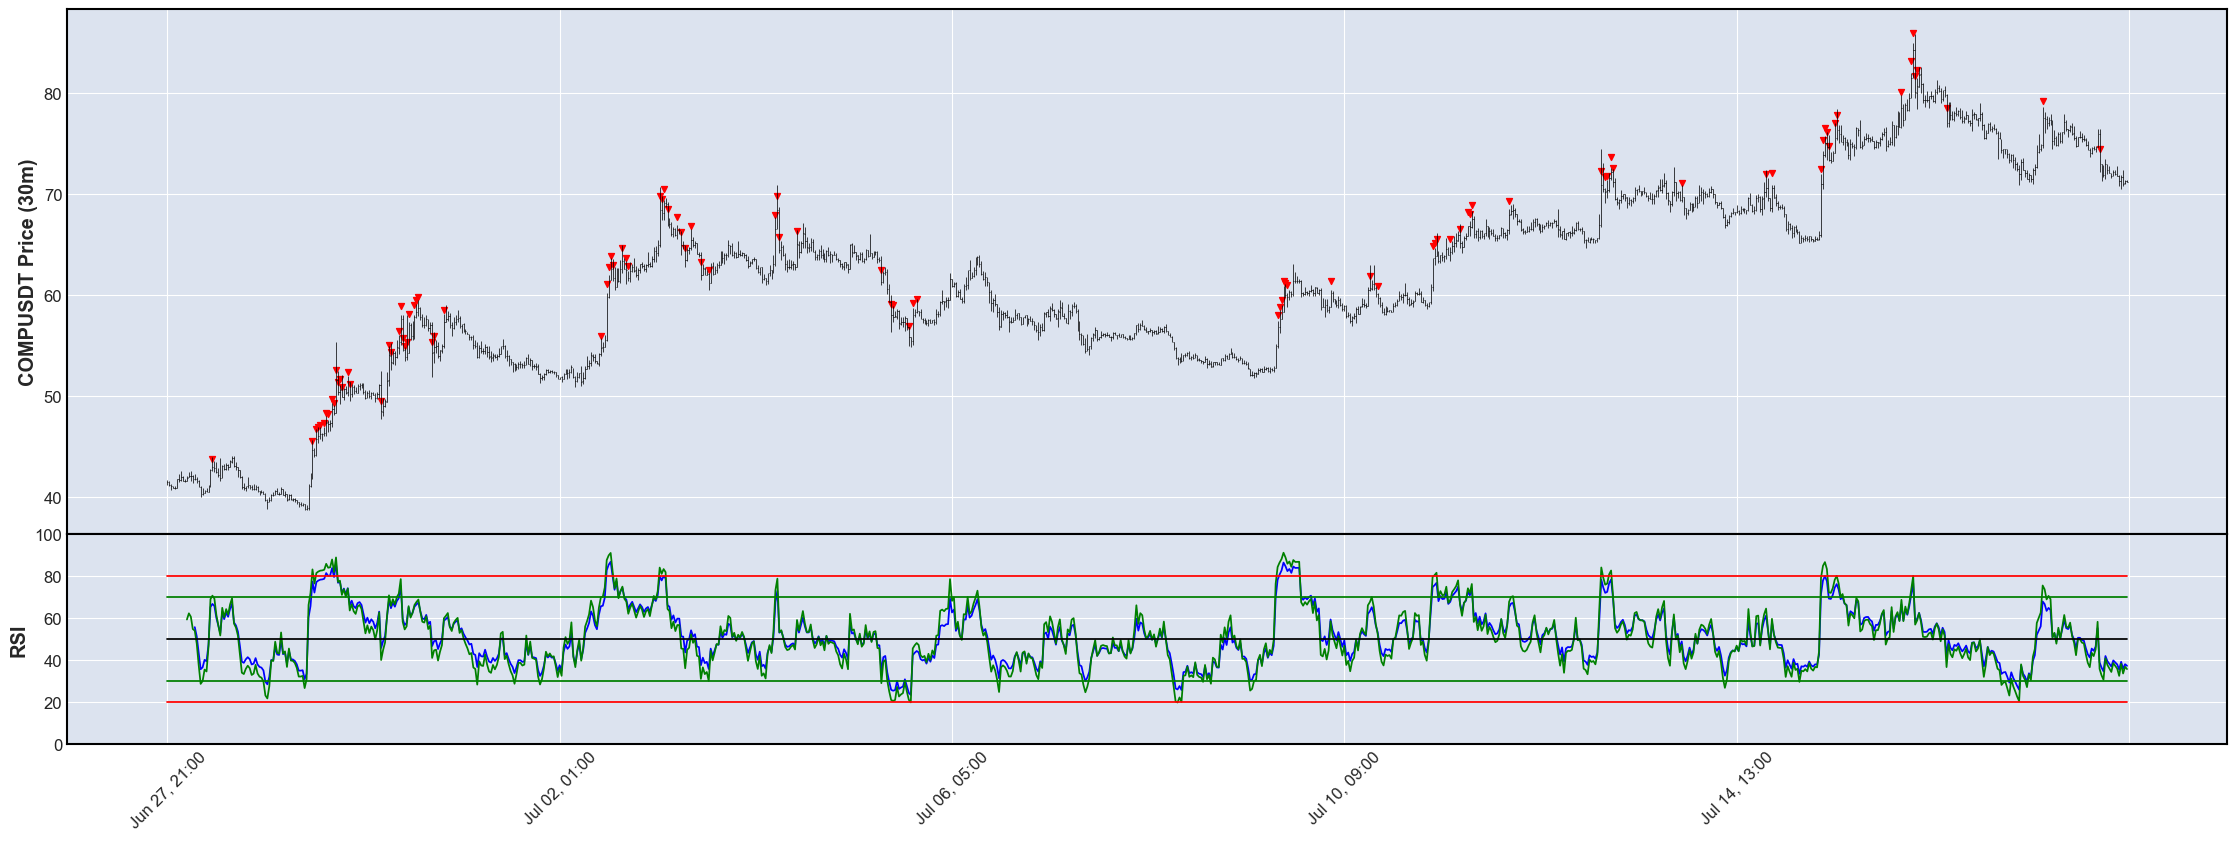

In [132]:
volumeSpike = np.where(selected_per)[0]
scatter = [ dfmpl.Close.iloc[i]*1.02 if i in volumeSpike else np.nan for i in np.arange(len(dfmpl.Close))]
len(volumeSpike)
RSI_close = ta.RSI(dfmpl.Close)
RSI_close10 = ta.RSI(dfmpl.Close,10)
apds = [ #mpf.make_addplot(slo,type='scatter',markersize=200,marker='^'),
    mpf.make_addplot(RSI_close,panel=1,color='b',type='line',ylim=(0,100),ylabel="RSI"),
    mpf.make_addplot(RSI_close10,panel=1,color='g',type='line',ylim=(0,100),secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+70,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+30,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+50,panel=1,color='k',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+80,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+20,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(scatter,color='r',type='scatter',marker="v"),
    #mpf.make_addplot(vlines,color='r',type='vline'),
       ]

fig, axlist =mpf.plot(dfmpl,addplot=apds,ylabel=f"{tickerpair} Price ({interval})",
        #vlines=dict(vlines=vlines,linewidths=0.01,alpha=0.3,colors="r"),
         returnfig=True,figsize=(20*1.5,7*1.5),warn_too_much_data=2000)

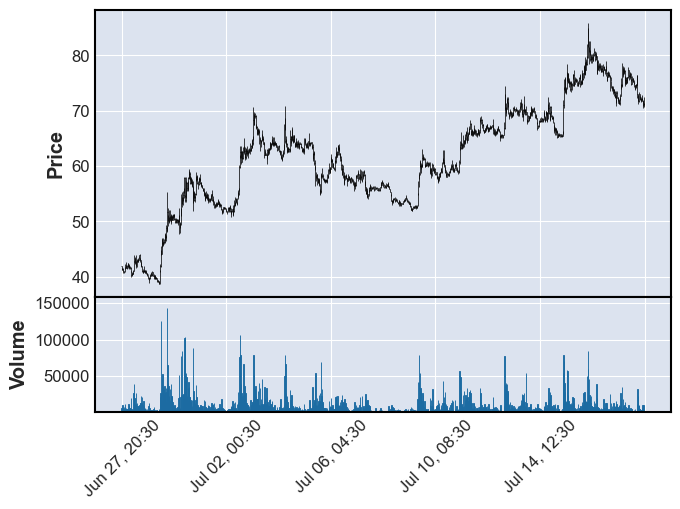

In [96]:
mpf.plot(dfmpl,type="ohlc",warn_too_much_data=2000,volume=True)

In [97]:
ws=10
#volumeSpike = np.where(dfmpl.Volume>(dfmpl.Volume.rolling(ws).mean()+dfmpl.Volume.rolling(ws).std()*2))[0]
volumeSpike = np.where(dfmpl.Volume>(dfmpl.Volume.rolling(ws).mean())*5)[0]
len(volumeSpike)

7

In [98]:
scatter = [ dfmpl.Close.iloc[i]*1.02 if i in volumeSpike else np.nan for i in np.arange(len(dfmpl.Close))]

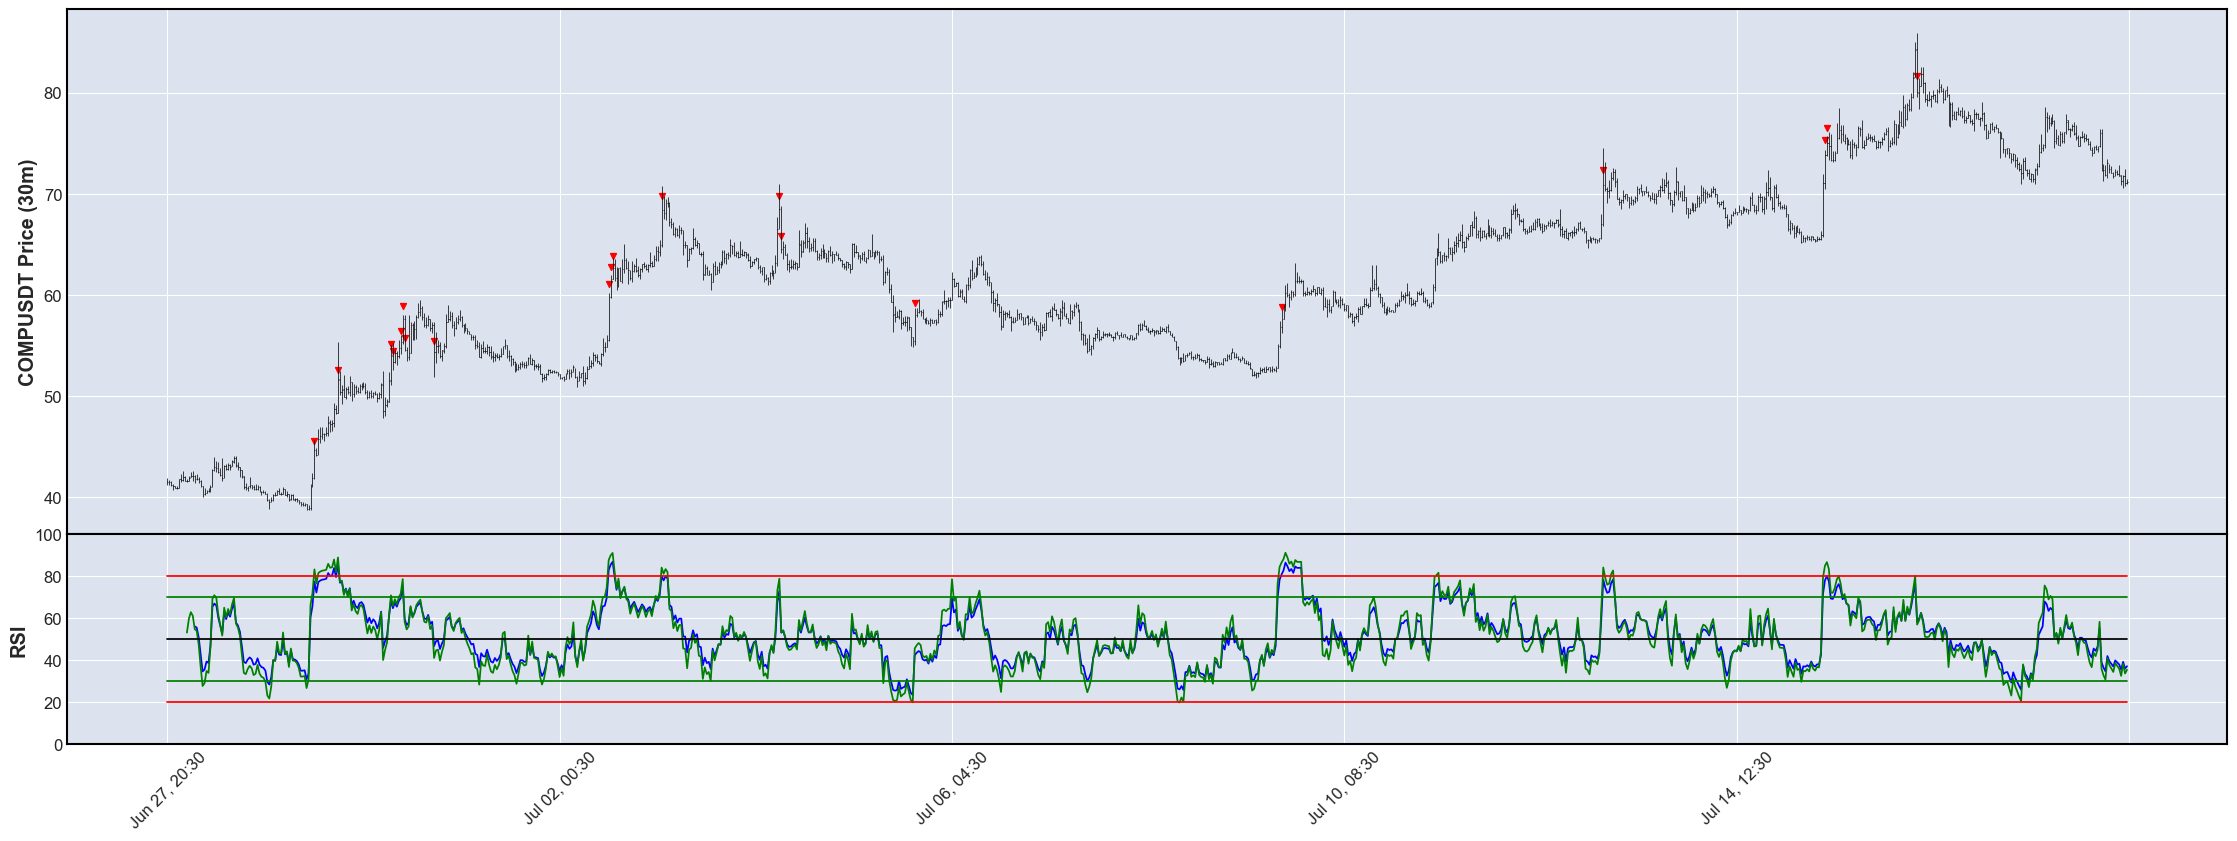

In [100]:
RSI_close = ta.RSI(dfmpl.Close)
RSI_close10 = ta.RSI(dfmpl.Close,10)
apds = [ #mpf.make_addplot(slo,type='scatter',markersize=200,marker='^'),
    mpf.make_addplot(RSI_close,panel=1,color='b',type='line',ylim=(0,100),ylabel="RSI"),
    mpf.make_addplot(RSI_close10,panel=1,color='g',type='line',ylim=(0,100),secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+70,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+30,panel=1,color='g',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+50,panel=1,color='k',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+80,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(dfmpl.Close*0+20,panel=1,color='r',type='line', secondary_y=False),
    mpf.make_addplot(scatter,color='r',type='scatter',marker="v"),
    #mpf.make_addplot(vlines,color='r',type='vline'),
       ]

fig, axlist =mpf.plot(dfmpl,addplot=apds,ylabel=f"{tickerpair} Price ({interval})",
        #vlines=dict(vlines=vlines,linewidths=0.01,alpha=0.3,colors="r"),
         returnfig=True,figsize=(20*1.5,7*1.5),warn_too_much_data=2000)